<a href="https://colab.research.google.com/github/tttyoung/hongong_machine_study1/blob/main/week06/%EC%9E%84%EB%B3%91%ED%9A%8C/Chapter07/%ED%98%BC%EA%B3%B5%EB%A8%B8_07_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

dict_keys(['accuracy', 'loss'])


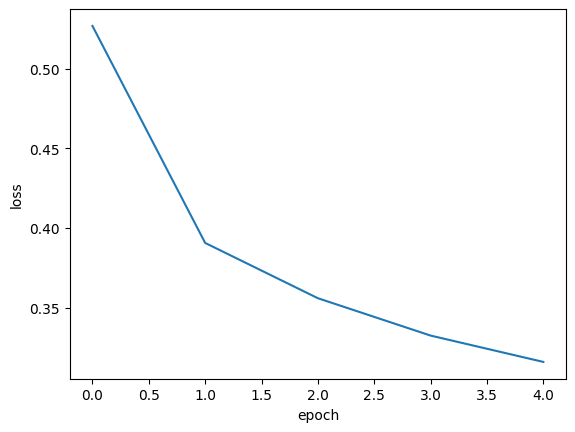

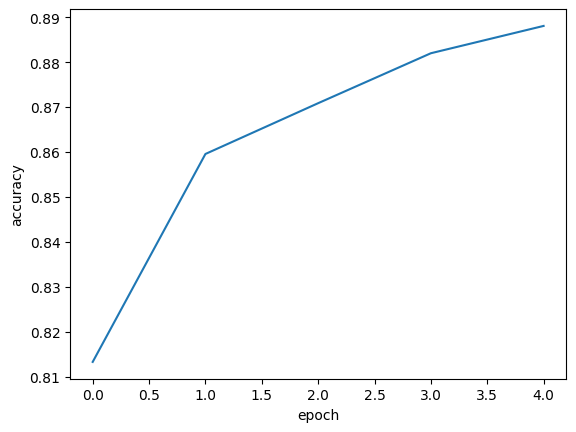

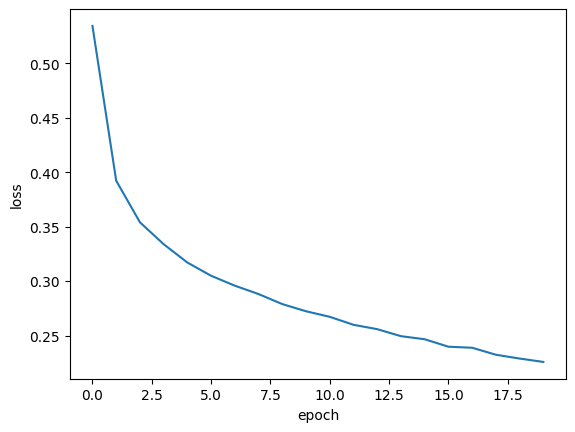

In [ ]:
# 데이터
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)
# 모델
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model
model=model_fn()
model.summary()
# fit 결과 to history
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# history
print(history.history.keys())
# history 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 에포크20
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 검증 데이터
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20,verbose=0,
                  validation_data=(val_scaled, val_target))
# history key
print(history.history.keys())
# 훈련 손실, 검증 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#Adam 적용
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 30퍼 드롭아웃
model=model_fn(keras.layers.Dropout(0.3))
model.summary()
# 검증 점수 계산
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 모델 저장
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_scaled, train_target,epochs=10,verbose=0,
                  validation_data=(val_scaled, val_target))
model.save_weights('dropout_weights.h5')
model.save('model-whole.h5')
# 파일 확인
!ls -al *.h5
#훈련하지않은 모델 to model-weght.h5
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('dropout_weights.h5')
# 정확도 계산
import numpy as np
val_labels=np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels==val_target))
# 모델 전체 읽은 후 정확도 출력
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)
# 콜백
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
history=model.fit(train_scaled, train_target, epochs=20,verbose=0,
                  validation_data=(val_scaled, val_target),
                  callbacks=[checkpoint_cb])
# 콜백 후 예측
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)
# 조기종료
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20,verbose=0,
                  validation_data=(val_scaled, val_target),
                  callbacks=[checkpoint_cb, early_stopping_cb])
#언제 중지?
print(early_stopping_cb.stopped_epoch)
# 손실 함수
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 성능확인
model.evaluate(val_scaled, val_target)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


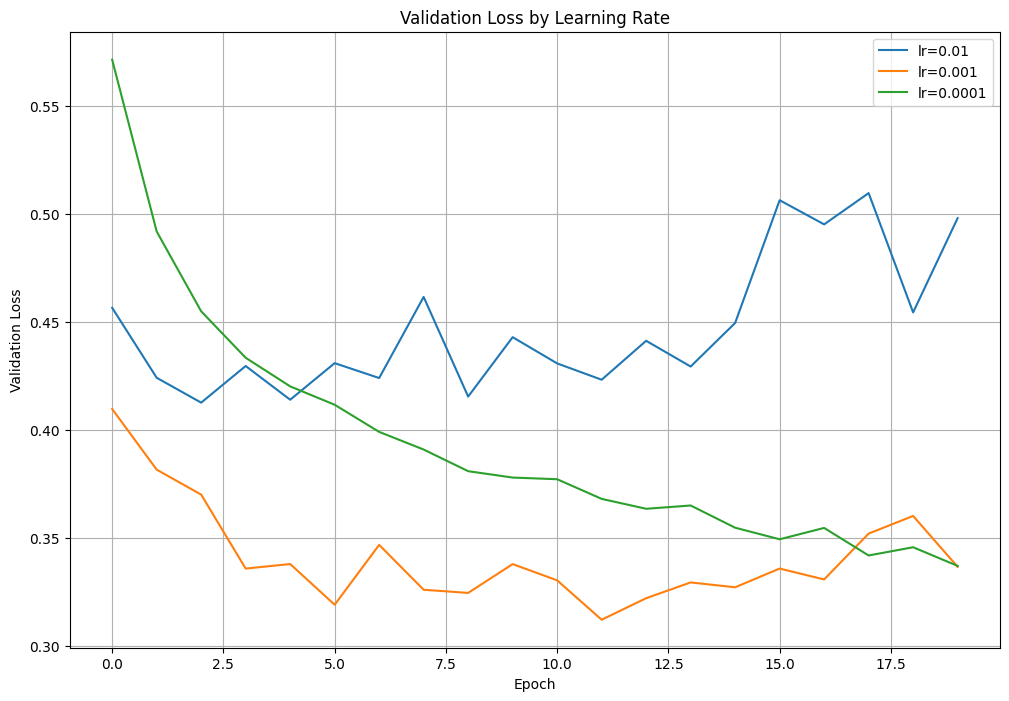

In [4]:
# 필요한 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 데이터 준비
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# 2. 모델 생성 함수 정의 (이전과 동일)
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model
    # 비교를 위한 기본 학습률 (책의 결과와 동일)
lr_default = 0.001
# 더 높은 학습률
lr_high = 0.01
# 더 낮은 학습률
lr_low = 0.0001

learning_rates = [lr_high, lr_default, lr_low]
histories = {} # 각 학습률별 훈련 기록을 저장할 딕셔너리

for lr in learning_rates:
    # 1. 모델 생성
    model = model_fn()

    # 2. Adam 옵티마이저에 학습률 설정
    adam = keras.optimizers.Adam(learning_rate=lr)

    # 3. 모델 컴파일
    model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 4. 모델 훈련 (결과를 history에 저장)
    history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                        validation_data=(val_scaled, val_target))

    # 5. 결과 저장
    histories[f'lr={lr}'] = history

# 6. 결과 시각화
plt.figure(figsize=(12, 8))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss by Learning Rate')
plt.grid(True)
plt.show()